# Data Analysis
#### Brands, Media Campaigns & Reach, and Other Insightful Information

## 0. Introduction
The following report is a non-comprehensive data analysis of a data set as part of a hiring process assessment (data consulting). It was developed entirely in Python, using pandas, seaborn and matplotlib as the main tools. However not an in-depth analysis, it aims to build some initial insights that could later lead to a more comprehensive analysis and more insightful discussions. It contains the following sections:
1. Installing Relevant Packages and Libraries
2. Obtaining and Cleaning the Data
3. Quick Exploratory Approach
4. Data Analysis<br>
      4.1 Brand<br>
      4.2 Media Format<br>
      4.3 Media Campaign<br>
      4.4 Source<br>
      4.5 Investment Trend and Possible Correlations<br>
5. Conclusion

### 1. Installing Relevant Packages and Libraries

In [1]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport
import requests
import tkinter

In [4]:
matplotlib.get_backend()
matplotlib.use('TkAgg')

In [5]:
%matplotlib inline

### 2. Obtaining and Cleaning the Data

In [6]:
url = 'http://190.60.218.154:4050/dataintelligence/peru/prueba/v1'

In [7]:
r = requests.get(url)

In [8]:
r_json = r.json()

In [9]:
tmp = [
    dict(kv for dict_ in item for kv in dict_.items())
    for item in r_json
]
df = pd.DataFrame(tmp)

In [10]:
df.drop(columns = ['id_campania','id_conjunto_anuncios','id_anuncio','moneda','country','objetivo'],axis = 1, inplace = True)

In [11]:
df['fecha'] = pd.to_datetime(df['fecha'])
df.sort_values(by='fecha',inplace=True)
df.reset_index(drop=True,inplace=True)
first_column = df.pop('fecha')
df.insert(0, 'fecha', first_column)

In [12]:
df.rename(columns = {'fecha':'Date','gasto':'Investment','interacciones':'Interactions', 'brand':'Brand',
                     'visitas_al_50':'Views 50%','visitas_al_75':'Views 75%','visitas_al100':'Source',
                     'formato':'Media Format','nombre_campania':'Media Campaign','impresiones':'Reach'},inplace = True)

In [13]:
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

In [14]:
df['Interaction Rate']=df['Interactions']/df['Reach']
df['Cost/Interaction'] = df['Investment']/df['Interactions']
df['Cost/Reach'] = df['Investment']/df['Reach']
df['Cost/View_50'] = df['Investment']/df['Views 50%']

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                datetime64[ns]
Investment                 float64
Interactions               float64
Views 50%                  float64
Views 75%                  float64
Source                      object
Brand                       object
Media Format                object
Media Campaign              object
Reach                      float64
Interaction Rate           float64
Cost/Interaction           float64
Cost/Reach                 float64
Cost/View_50               float64
dtype: object

In [18]:
df.duplicated().sum()

478

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.isna().sum()

Date                   0
Investment             0
Interactions           0
Views 50%           2214
Views 75%           2214
Source                 0
Brand                  0
Media Format        4383
Media Campaign         0
Reach                  0
Interaction Rate     137
Cost/Interaction      86
Cost/Reach            85
Cost/View_50        2215
dtype: int64

In [21]:
df['Views 50%'].fillna(df['Views 50%'].mean(),inplace=True)
df['Views 75%'].fillna(df['Views 75%'].mean(),inplace=True)
df['Interaction Rate'].fillna(df['Interaction Rate'].mean(),inplace=True)
df['Cost/Interaction'].fillna(df['Cost/Interaction'].mean(),inplace=True)
df['Cost/Reach'].fillna(df['Cost/Reach'].mean(),inplace=True)
df['Cost/View_50'].fillna(df['Cost/View_50'].mean(),inplace=True)

In [22]:
df

,Date,Investment,Interactions,Views 50%,Views 75%,Source,Brand,Media Format,Media Campaign,Reach,Interaction Rate,Cost/Interaction,Cost/Reach,Cost/View_50
0,2019-06-03,189.090000,4376.0,9313.000000,5987.000000,Facebook,PILSEN CALLAO,Video,AON,7.555570e+05,0.005792,0.043211,0.000250,0.020304
1,2019-06-04,173.790000,303.0,35251.000000,21161.000000,FB + IG,CUSQUENA,Video,AON,5.291410e+05,0.000573,0.573564,0.000328,0.004930
2,2019-06-04,433.960000,8370.0,18280.000000,11801.000000,Facebook,PILSEN CALLAO,Video,AON,1.422695e+06,0.005883,0.051847,0.000305,0.023740
3,2019-06-04,125.900000,1346.0,11528.000000,7724.000000,FB + IG,CUSQUENA,Video,AON,3.522840e+05,0.003821,0.093536,0.000357,0.010921
4,2019-06-04,666.666667,0.0,8799.700177,7980.764385,FB + IG,PILSEN CALLAO,None,AON,1.212121e+06,0.000000,inf,0.000550,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12238,2019-12-31,48.780000,19.0,3845.000000,2337.000000,FB + IG,PILSEN CALLAO,Video,AON,1.126740e+05,0.000169,2.567368,0.000433,0.012687
12239,2019-12-31,461.538462,0.0,8799.700177,7980.764385,Oath,CUSQUENA,None,GASTRONOMIA,6.593407e+04,0.000000,inf,0.007000,inf
12240,2019-12-31,142.720000,3498.0,11505.000000,7142.000000,FB + IG,CUSQUENA,Video,FIN DE ANO,2.254340e+05,0.015517,0.040800,0.000633,0.012405
12241,2019-12-31,311.270000,5176.0,24758.000000,14841.000000,FB + IG,PILSEN CALLAO,Video,AON,7.245730e+05,0.007144,0.060137,0.000430,0.012573


In [36]:
# Write and download the clean dataset into a .csv file.

df.to_csv('Dot.csv', encoding='utf-8', index=False)

### 3. Quick Exploratory Approach

In [119]:
df.head()

,Date,Investment,Interactions,Views 50%,Views 75%,Source,Brand,Media Format,Media Campaign,Reach,Interaction Rate,Cost/Interaction,Cost/Reach,Cost/View_50
0,2019-06-03,189.090000,4376.0,9313.000000,5987.000000,Facebook,PILSEN CALLAO,Video,AON,7.555570e+05,0.005792,0.043211,0.000250,0.020304
1,2019-06-04,173.790000,303.0,35251.000000,21161.000000,FB + IG,CUSQUENA,Video,AON,5.291410e+05,0.000573,0.573564,0.000328,0.004930
2,2019-06-04,433.960000,8370.0,18280.000000,11801.000000,Facebook,PILSEN CALLAO,Video,AON,1.422695e+06,0.005883,0.051847,0.000305,0.023740
3,2019-06-04,125.900000,1346.0,11528.000000,7724.000000,FB + IG,CUSQUENA,Video,AON,3.522840e+05,0.003821,0.093536,0.000357,0.010921
4,2019-06-04,666.666667,0.0,8799.700177,7980.764385,FB + IG,PILSEN CALLAO,None,AON,1.212121e+06,0.000000,inf,0.000550,inf


In [116]:
df.describe()

/home/nykolai/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Investment,Interactions,Views 50%,Views 75%,Reach,Interaction Rate,Cost/Interaction,Cost/Reach,Cost/View_50
count,11765.000000,11765.000000,11765.000000,11765.000000,1.176500e+04,11765.000000,1.176500e+04,1.176500e+04,1.176500e+04
mean,122.875174,492.837909,8799.700177,7980.764385,9.861946e+04,0.017630,inf,inf,inf
std,287.892107,2396.988374,33900.114377,32438.259418,2.638059e+05,0.087948,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.415191e-03,0.000000e+00,3.333333e-04
25%,3.508870,0.000000,0.000000,0.000000,4.893913e+02,0.000000,3.800000e-01,1.118831e-03,7.655678e-03
50%,27.840000,2.000000,403.000000,331.405000,5.795000e+03,0.000546,3.450000e+00,4.453868e-03,NaN
75%,125.660000,54.000000,8799.700177,7980.764385,6.499100e+04,0.007036,NaN,1.000000e-02,NaN
max,12129.210000,75542.000000,606496.000000,594340.000000,7.580756e+06,2.928094,inf,inf,inf


In [120]:
df.columns

Index(['Date', 'Investment', 'Interactions', 'Views 50%', 'Views 75%',
       'Source', 'Brand', 'Media Format', 'Media Campaign', 'Reach',
       'Interaction Rate', 'Cost/Interaction', 'Cost/Reach', 'Cost/View_50'],
      dtype='object')

## 4. Data Analysis
We will focus in the four categorical variables, Brand, Media Format, Media Campaign and Source, and explore their behavior in terms of count, reach, interaction rate, cost per interaction and cost per rate.

### 4.1 Brand

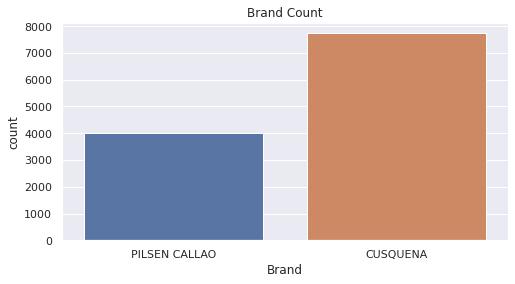

In [94]:
sns.countplot(x=df['Brand']).set(title='Brand Count')
sns.set(rc={"figure.figsize":(8, 4)})
plt.show()

[Text(0.5, 1.0, 'Brand Reach')]

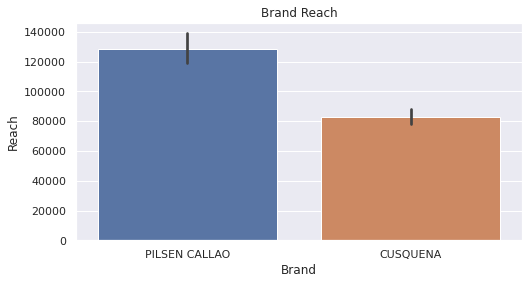

In [97]:
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.xticks(rotation=0)
sns.barplot(x=df['Brand'],y=df['Reach']).set(title='Brand Reach')

[Text(0.5, 1.0, 'Brand Interaction Rate')]

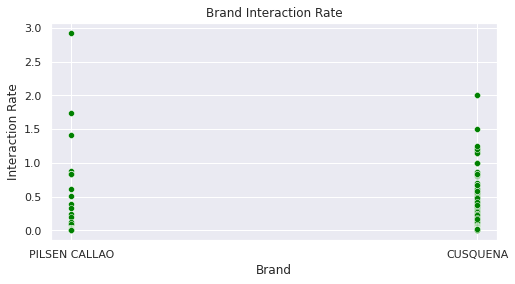

In [98]:
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.xticks(rotation=0)
sns.scatterplot(x=df['Brand'],y=df['Interaction Rate'], color='green').set(title='Brand Interaction Rate')

The count of Pilsen Callao represents almost half of Cusqueña's, yet Pilsen Callao has a much better Reach and a higher Interaction Rate.

[Text(0.5, 1.0, 'Brand Cost per Interaction')]

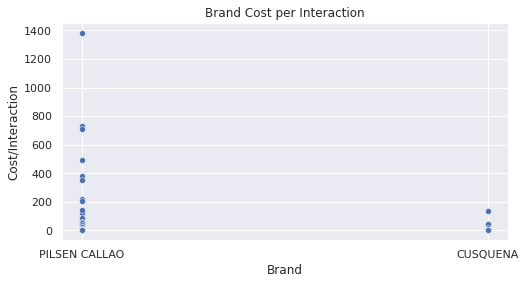

In [101]:
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.xticks(rotation=0)
sns.scatterplot(x=df['Brand'],y=df['Cost/Interaction']).set(title='Brand Cost per Interaction')

[Text(0.5, 1.0, 'Brand Cost per Reach')]

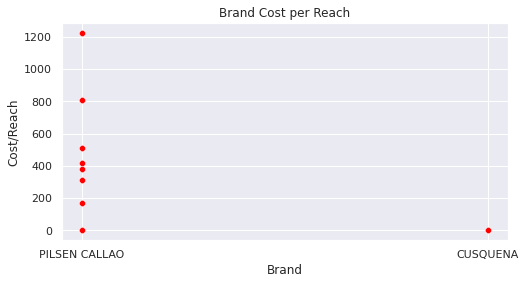

In [103]:
fig = plt.gcf()
fig.set_size_inches(8, 4)
plt.xticks(rotation=0)
sns.scatterplot(x=df['Brand'],y=df['Cost/Reach'], color='red').set(title='Brand Cost per Reach')

However, Pilsen Callao's Cost per Interaction and Cost per Reach are much higher than Cusqueña's.

### 4.2 Media Format

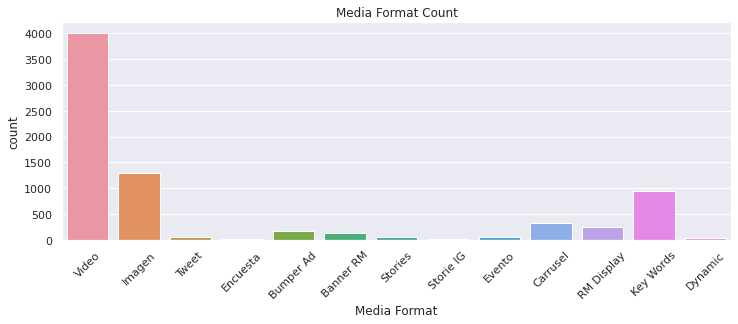

In [66]:
sns.countplot(x=df['Media Format']).set(title='Media Format Count')
plt.xticks(rotation=45)
sns.set(rc={"figure.figsize":(18, 4)})
plt.show()

[Text(0.5, 1.0, 'Media Format Reach')]

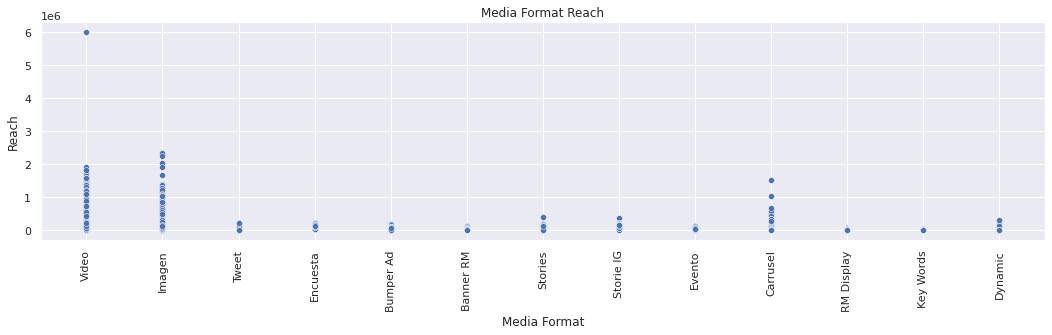

In [67]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.scatterplot(x=df['Media Format'],y=df['Reach']).set(title='Media Format Reach')

Images and Videos are the media format with the better Reach, followed by Carrusel.

[Text(0.5, 1.0, 'Media Format Interaction Rate')]

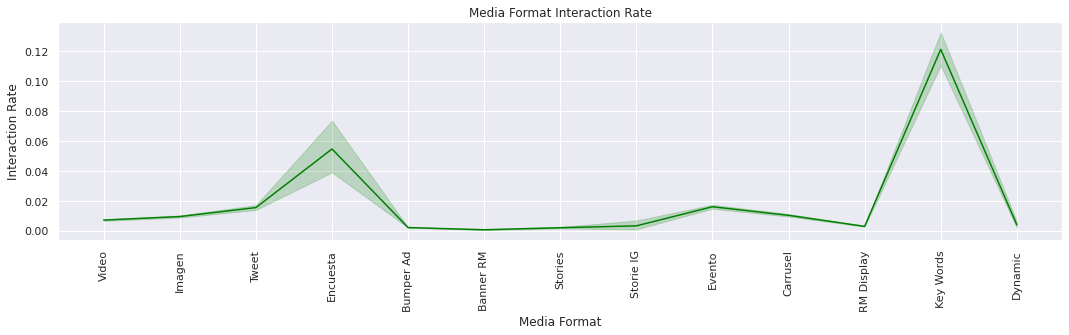

In [68]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.lineplot(x=df['Media Format'],y=df['Interaction Rate'], color='green').set(title='Media Format Interaction Rate')

On the other hand, the highest Interaction Rate is strongly linked to the usage of Key Words, followed by the "Encuesta" strategy and Videos.

[Text(0.5, 1.0, 'Media Cost per Interaction')]

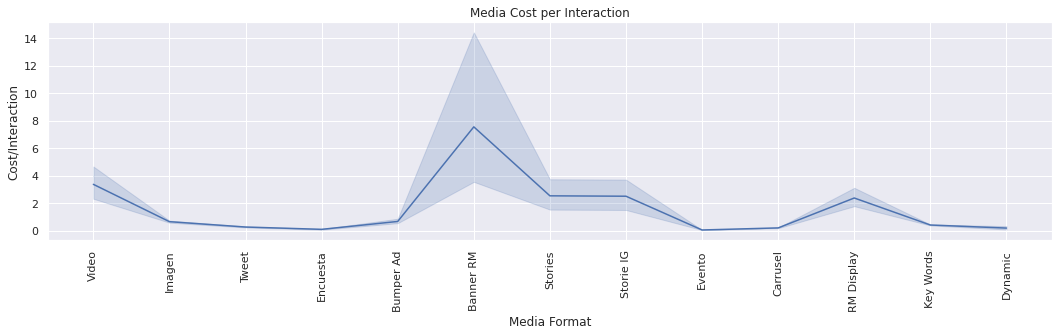

In [69]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.lineplot(x=df['Media Format'],y=df['Cost/Interaction']).set(title='Media Format Cost per Interaction')

Banner RM has the highest Cost per Interaction Ratio, whereas Key Words and Encuesta have one of the lowest.

[Text(0.5, 1.0, 'Media Cost per Reach')]

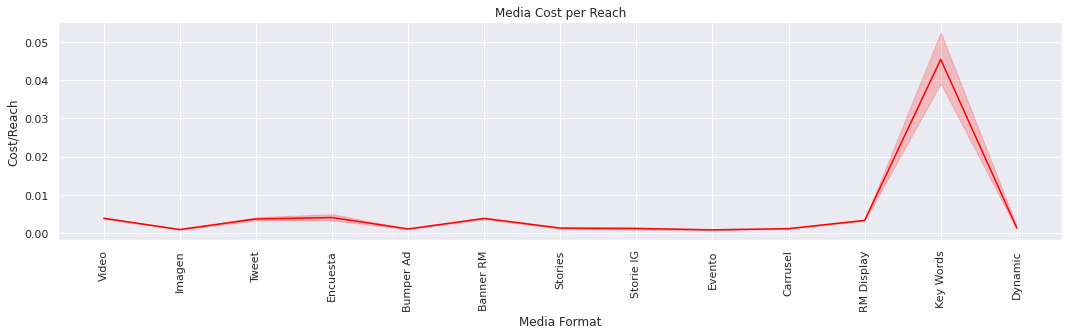

In [70]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.lineplot(x=df['Media Format'],y=df['Cost/Reach'], color='red').set(title='Media Format Cost per Reach')

However, the Cost per Reach of the Key Words strategy is the highest.

### 4.3 Media Campaign

[Text(0.5, 1.0, 'Media Campaign Count')]

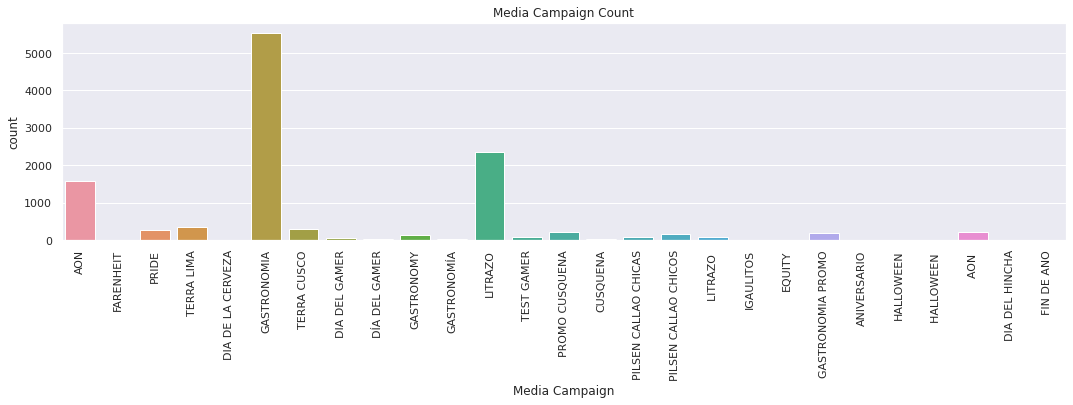

In [71]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.countplot(x=df['Media Campaign']).set(title='Media Campaign Count')

"Gastronomia" has clearly the highest count of all Media Campaign, followed by "Litrazo", with less than half of "Gastronomia"'s count, and "AON", with less than a third.

[Text(0.5, 1.0, 'Media Campaign Reach')]

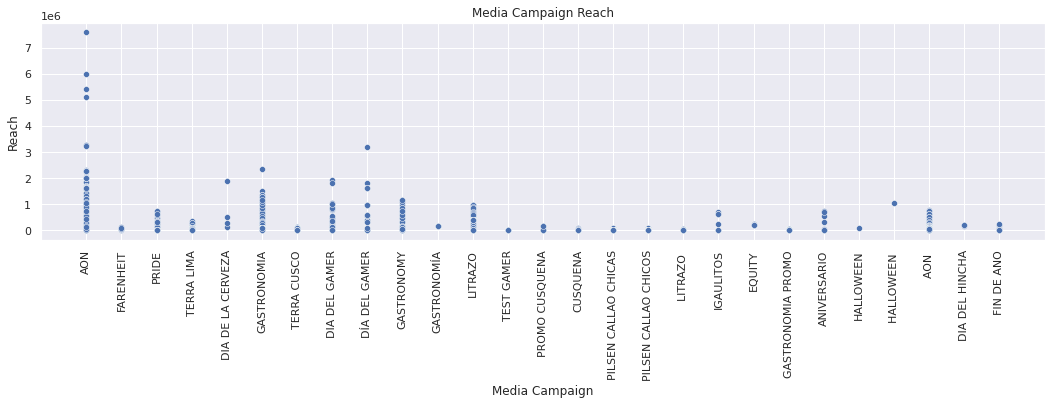

In [72]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.scatterplot(x=df['Media Campaign'],y=df['Reach']).set(title='Media Campaign Reach')

However, AON has clearly the highest reach, followed by "Dia del Gamer". We find "Gastronomia" in third place.

[Text(0.5, 1.0, 'Media Campaign Interaction Rate')]

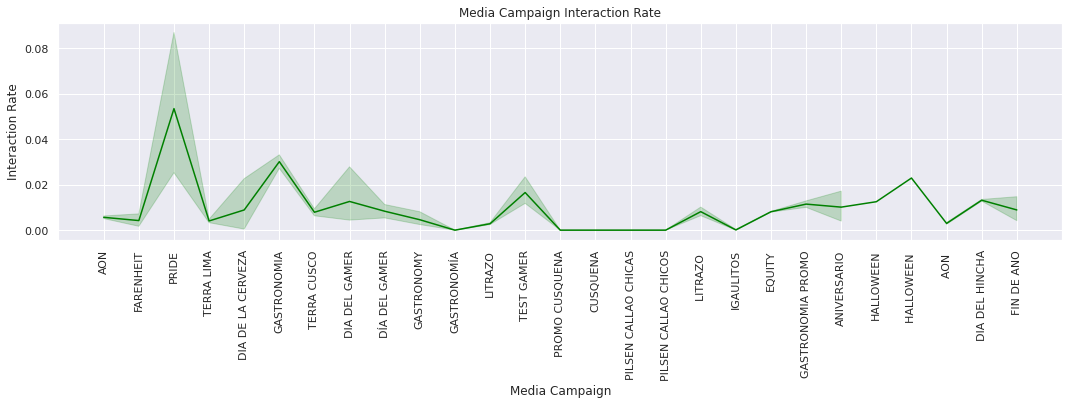

In [75]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.lineplot(x=df['Media Campaign'],y=df['Interaction Rate'], color='green').set(title='Media Campaign Interaction Rate')

"Pride" has clearly the highest Interaction Rate, followed by "Gastronomia".

[Text(0.5, 1.0, 'Media Campaign Cost per Interaction')]

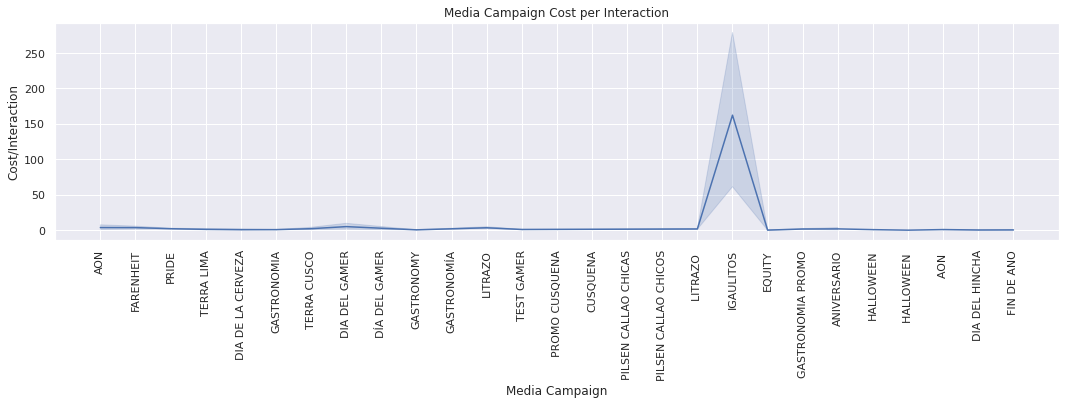

In [78]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.lineplot(x=df['Media Campaign'],y=df['Cost/Interaction']).set(title='Media Campaign Cost per Interaction')

The Cost per Interaction of "Igualitos" is visibly higher than that of any other Media Campaign strategy.

[Text(0.5, 1.0, 'Media CampaignCost per Reach')]

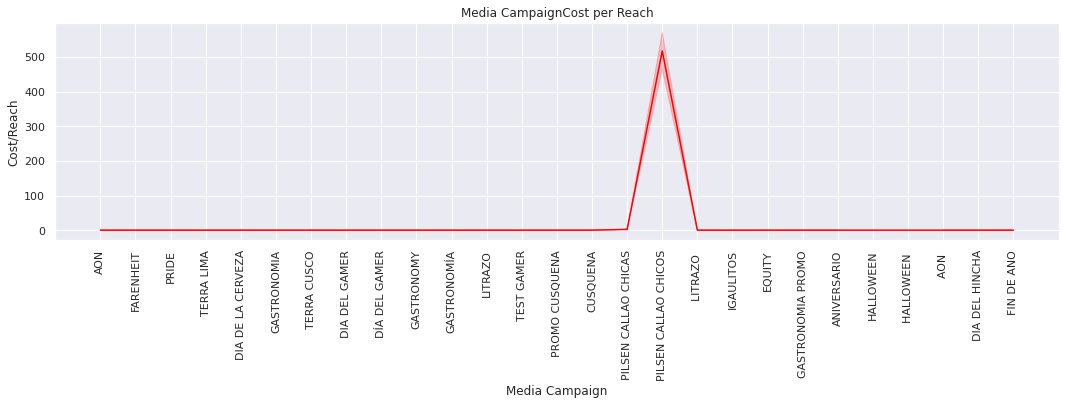

In [80]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.lineplot(x=df['Media Campaign'],y=df['Cost/Reach'], color='red').set(title='Media CampaignCost per Reach')

Regarding Cost per Reach, "Pilsen Callao Chicos" is significantly higher than the rest.

### 4.4 Source

[Text(0.5, 1.0, 'Source Count')]

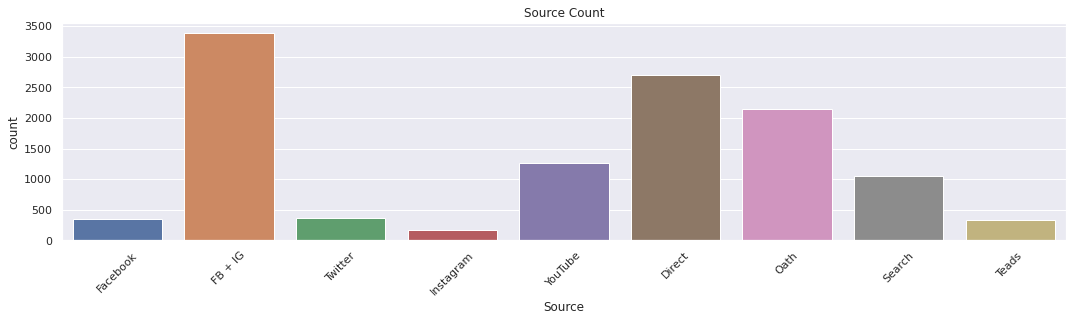

In [73]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=45)
sns.countplot(x=df['Source']).set(title='Source Count')

FB+IG has the highest count, followed by Dirct and Oath.

[Text(0.5, 1.0, 'Source Reach')]

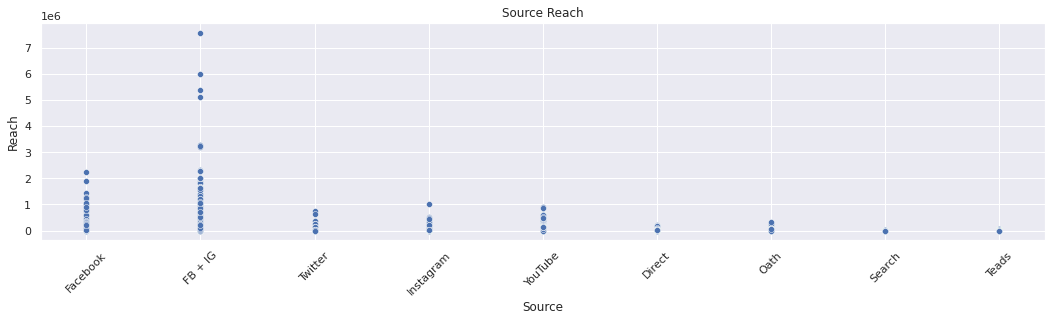

In [74]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=45)
sns.scatterplot(x=df['Source'],y=df['Reach']).set(title='Source Reach')

The highest Source Reach falls on FB+IG, doubling Facebook. Next, are Youtube, Instagram and Twitter.

[Text(0.5, 1.0, 'Interaction Rate per Source')]

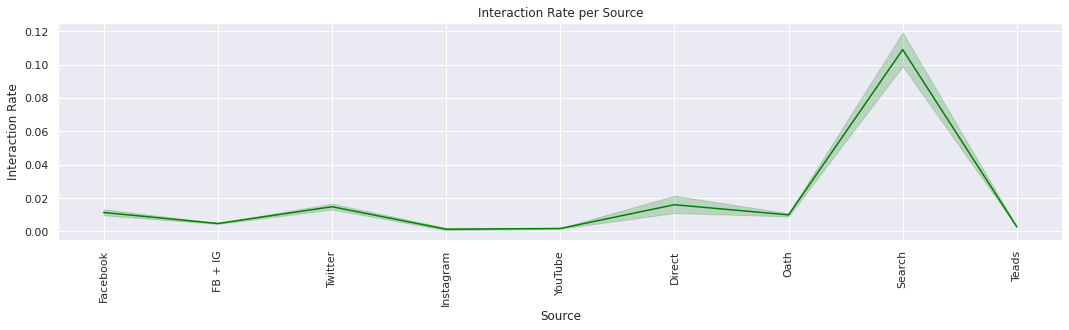

In [82]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.lineplot(x=df['Source'],y=df['Interaction Rate'], color='green').set(title='Interaction Rate per Source')

Other than Search (which has the highest IR), Direct, Twitter and Facebook have positive Interaction Rates.

[Text(0.5, 1.0, 'Source Cost per Interaction')]

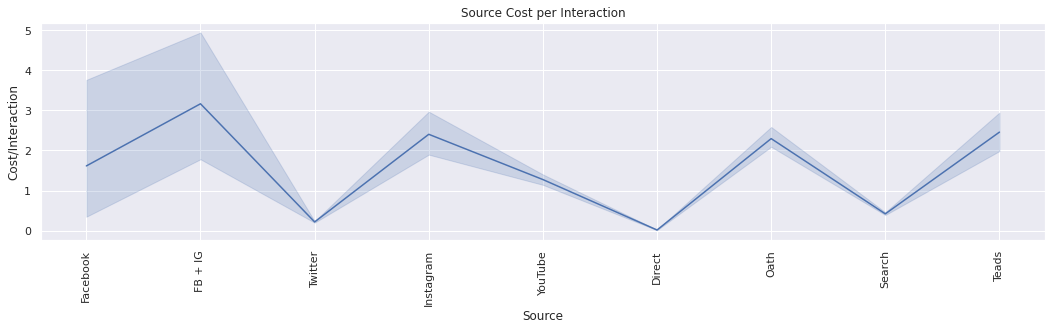

In [83]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.lineplot(x=df['Source'],y=df['Cost/Interaction']).set(title='Source Cost per Interaction')

FB+IG and Instagram have the highest Cost per Interaction, whereas Twitter, Direct and Search have the lowest.

[Text(0.5, 1.0, 'Source Cost per Reach')]

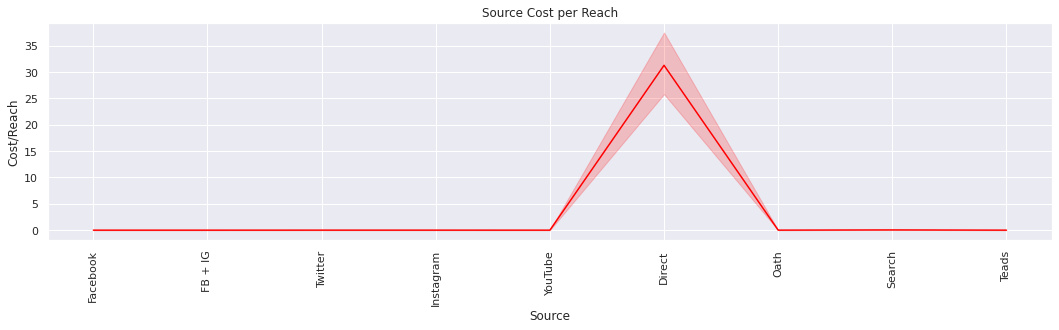

In [85]:
fig = plt.gcf()
fig.set_size_inches(18, 4)
plt.xticks(rotation=90)
sns.lineplot(x=df['Source'],y=df['Cost/Reach'], color='red').set(title='Source Cost per Reach')

However, Direct stands out as having the highest Cost per Reach.

### 4.5 Investment Trend and Possible Correlations

[Text(0.5, 1.0, 'Investment Through Time'), (0.0, 1600.0)]

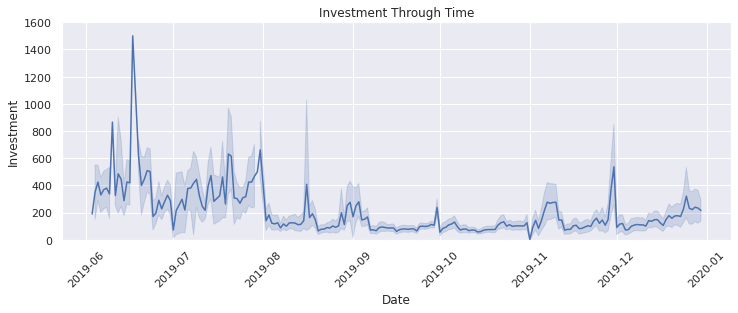

In [115]:
#sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
#fmri = sns.load_dataset(df['gasto'])
plt.xticks(rotation=45)
sns.set(rc={"figure.figsize":(12, 4)})
sns.lineplot(data=df, x=df['Date'][:11720], y=df['Investment']).set(title='Investment Through Time',ylim=(0,1600))

Investment shows a decline throughout the six months time of the data.

<AxesSubplot:>

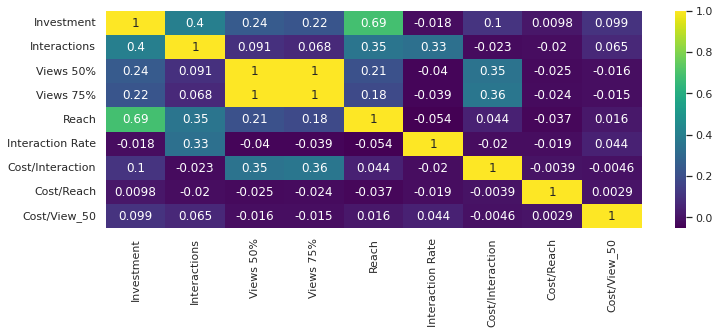

In [35]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

There seems to be a positive correlation between the investment and the reach.

## 5. Conclusion
Some valuable insights can be built from this non-comprehensive Data Analysis. However, a more in-depth analysis of these first visible trends is required, as well as a sharp interpretation in the light of environmental/cultural factors and concrete business goals. In order to acheive this, more time would be required, thus discretion is adviced in the reading of this report. 